# Forecast the PlasticSales data set. Prepare a document for each model explaining 
how many dummy variables you have created and RMSE value for each model. Finally which model you will use for 
Forecasting.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing # 
from datetime import datetime,time


In [2]:
from statsmodels.tsa.ar_model import AR,ARResults

In [3]:
plasticsales = pd.read_csv("C:\\Excelr Data\\Assignments\\Forecasting\\PlasticSales.csv")

In [4]:
plasticsales['date'] = (pd.to_datetime(plasticsales['Month']))

In [5]:
plasticsales.loc[plasticsales['Month'].notnull(), 'Months'] = plasticsales['Month'].str[0:3]


In [6]:
plastic = plasticsales.drop(labels='Month',axis=1)

In [7]:
plastic.head()

,Sales,date,Months
0,742,2049-01-01,Jan
1,697,2049-02-01,Feb
2,776,2049-03-01,Mar
3,898,2049-04-01,Apr
4,1030,2049-05-01,May


In [8]:
month_dummies = pd.DataFrame(pd.get_dummies(plastic['Months'],drop_first=True))
month_dummies.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0


In [9]:
plastic = pd.concat([plastic,month_dummies],axis = 1)

In [10]:
plastic.head()

,Sales,date,Months,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,742,2049-01-01,Jan,0,0,0,1,0,0,0,0,0,0,0
1,697,2049-02-01,Feb,0,0,1,0,0,0,0,0,0,0,0
2,776,2049-03-01,Mar,0,0,0,0,0,0,1,0,0,0,0
3,898,2049-04-01,Apr,0,0,0,0,0,0,0,0,0,0,0
4,1030,2049-05-01,May,0,0,0,0,0,0,0,1,0,0,0


In [11]:
len(plastic)

60

In [12]:
plastic["t"] = np.arange(1,61)
plastic["t_squared"] = plastic["t"]*plastic["t"]

In [13]:
plastic.columns

Index(['Sales', 'date', 'Months', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun',
       'Mar', 'May', 'Nov', 'Oct', 'Sep', 't', 't_squared'],
      dtype='object')

In [14]:
plastic["log_Sales"] = np.log(plastic["Sales"])

In [15]:
plastic.head()

,Sales,date,Months,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_Sales
0,742,2049-01-01,Jan,0,0,0,1,0,0,0,0,0,0,0,1,1,6.609349
1,697,2049-02-01,Feb,0,0,1,0,0,0,0,0,0,0,0,2,4,6.546785
2,776,2049-03-01,Mar,0,0,0,0,0,0,1,0,0,0,0,3,9,6.654153
3,898,2049-04-01,Apr,0,0,0,0,0,0,0,0,0,0,0,4,16,6.800170
4,1030,2049-05-01,May,0,0,0,0,0,0,0,1,0,0,0,5,25,6.937314


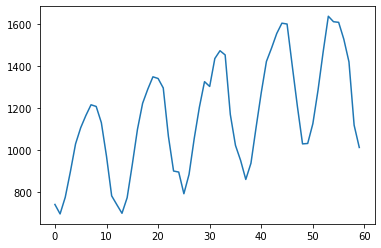

In [16]:
plastic.Sales.plot()

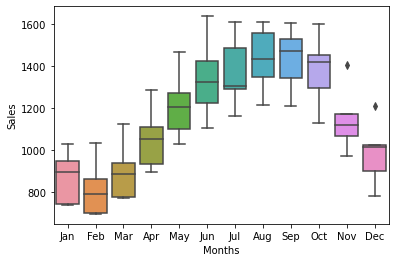

In [17]:
# Boxplot for ever
sns.boxplot(x="Months",y="Sales",data=plastic)

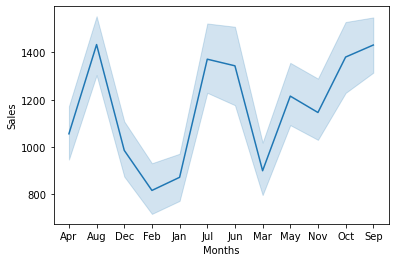

In [18]:
# Line plot for Ridership based on year
sns.lineplot(x="Months",y="Sales",data=plastic)

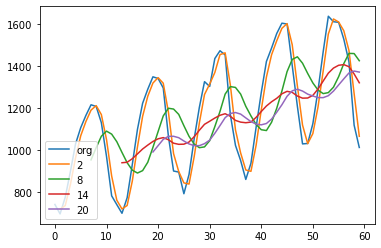

In [19]:
# Centering moving average for the time series to understand better about the trend character in Plastic
plastic.Sales.plot(label="org")
for i in range(2,24,6):
    plastic["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)

C:\Users\deshp\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


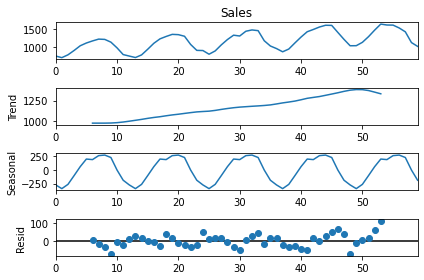

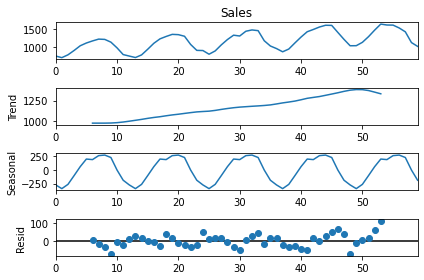

In [20]:
# Time series decomposition plot 
decompose_ts_add = seasonal_decompose(plastic.Sales,model="additive",freq=12)
decompose_ts_add.plot()


C:\Users\deshp\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


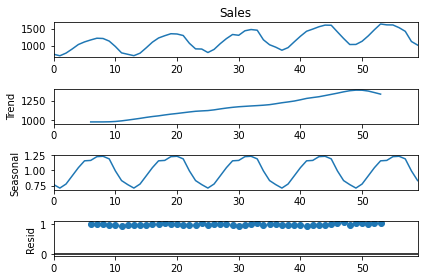

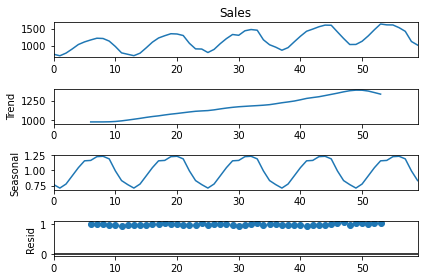

In [21]:
# Time series decomposition plot 
decompose_ts_mul = seasonal_decompose(plastic.Sales,model="multiplicative",freq=12)
decompose_ts_mul.plot()

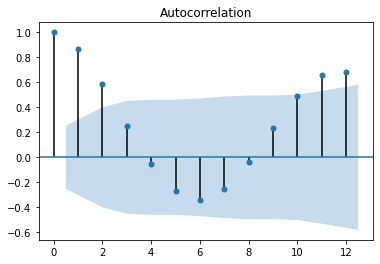

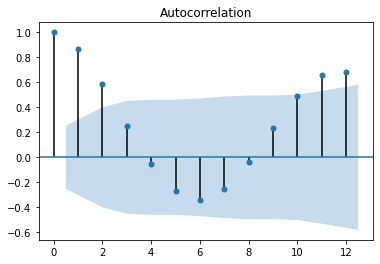

In [22]:
# ACF plots on Original data sets 
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(plastic.Sales,lags=12)


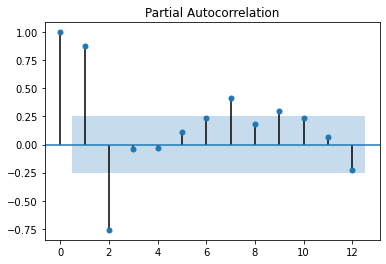

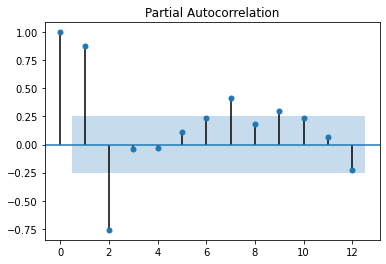

In [23]:
# PACF plots on Original data sets
tsa_plots.plot_pacf(plastic.Sales,lags=12)


In [24]:
len(plastic)

60

In [25]:
Train = plastic.head(45)
Test = plastic.tail(16)

In [26]:
#train_len = len(plastic)-12
#Train = plastic.iloc[:train_len]
#Test = plastic.iloc[train_len:]

In [27]:
####################### L I N E A R ##########################
import statsmodels.formula.api as smf 

linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
rmse_linear

243.66924672552756

In [28]:
##################### Exponential ##############################

Exp = smf.ols('log_Sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

250.3858496769739

In [29]:
#################### Quadratic ###############################

Quad = smf.ols('Sales~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

274.36199693376443

In [30]:
################### Additive seasonality ########################

add_sea = smf.ols('Sales~Jan+Feb+Mar+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

253.81684857693725

In [31]:
################# Additive Seasonality Quadratic ############################

add_sea_Quad = smf.ols('Sales~t+t_squared+Jan+Feb+Mar+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad 

146.57790105366706

In [32]:
################## Multiplicative Seasonality ##################

Mul_sea = smf.ols('log_Sales~Jan+Feb+Mar+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

258.38270506437794

In [33]:
##################Multiplicative Additive Seasonality ###########

Mul_Add_sea = smf.ols('log_Sales~t+Jan+Feb+Mar+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

129.13323511412977

In [34]:
################## Testing #######################################

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea",
"rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,
                                               rmse_Mult_add_sea])}


In [35]:
table_rmse=pd.DataFrame(data)
table_rmse


,MODEL,RMSE_Values
0,rmse_linear,243.669247
1,rmse_Exp,250.385850
2,rmse_Quad,274.361997
3,rmse_add_sea,253.816849
4,rmse_add_sea_quad,146.577901
5,rmse_Mult_sea,258.382705
6,rmse_Mult_add_sea,129.133235


In [36]:
#Predicting new values 

model_full = smf.ols('log_Sales~t+Jan+Feb+Mar+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = Train).fit()


In [37]:
pred_new  = pd.Series(Mul_Add_sea.predict(Test))
pred_new1=np.exp(pred_new)

pred_new1

44    1587.449783
45    1523.152755
46    1261.885119
47    1061.906915
48    1021.648441
49     938.157179
50    1037.674190
51    1228.408691
52    1417.527604
53    1560.910911
54    1612.848342
55    1708.367915
56    1727.227415
57    1657.268925
58    1372.996233
59    1155.409611
dtype: float64

In [38]:
Test["forecasted_Sales"] = pd.Series(pred_new1)

Test

C:\Users\deshp\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Sales,date,Months,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_Sales,forecasted_Sales
44,1604,2052-09-01,Sep,0,0,0,0,0,0,0,0,0,0,1,45,2025,7.380256,1587.449783
45,1600,2052-10-01,Oct,0,0,0,0,0,0,0,0,0,1,0,46,2116,7.377759,1523.152755
46,1403,2052-11-01,Nov,0,0,0,0,0,0,0,0,1,0,0,47,2209,7.246368,1261.885119
47,1209,2052-12-01,Dec,0,1,0,0,0,0,0,0,0,0,0,48,2304,7.097549,1061.906915
48,1030,2053-01-01,Jan,0,0,0,1,0,0,0,0,0,0,0,49,2401,6.937314,1021.648441
49,1032,2053-02-01,Feb,0,0,1,0,0,0,0,0,0,0,0,50,2500,6.939254,938.157179
50,1126,2053-03-01,Mar,0,0,0,0,0,0,1,0,0,0,0,51,2601,7.026427,1037.674190
51,1285,2053-04-01,Apr,0,0,0,0,0,0,0,0,0,0,0,52,2704,7.158514,1228.408691
52,1468,2053-05-01,May,0,0,0,0,0,0,0,1,0,0,0,53,2809,7.291656,1417.527604
53,1637,2053-06-01,Jun,0,0,0,0,0,1,0,0,0,0,0,54,2916,7.400621,1560.910911


In [39]:
# Creating a function to calculate the MAPE value for test data 
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)


In [40]:
# Simple Exponential Method
ses_model = SimpleExpSmoothing(Train["Sales"]).fit()
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Sales) 


C:\Users\deshp\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


22.51952248222201

In [41]:
# Holt method 
hw_model = Holt(Train["Sales"]).fit()
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Sales) 


50.64974553844403

In [42]:
# Holts winter exponential smoothing with additive seasonality and additive trend
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Sales) 


C:\Users\deshp\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\deshp\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


8.44806563443182

In [43]:
hwe_model_add_add = ExponentialSmoothing(plastic["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = plastic.index[0],end = plastic.index[-1])


C:\Users\deshp\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [44]:
# Holts winter exponential smoothing with multiplicative seasonality and additive trend
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Sales) 


8.005075286266093

In [45]:
# Lets us use auto_arima from p
from pmdarima.arima import auto_arima

In [46]:
auto_arima_model = auto_arima(Train["Sales"],start_p=0,
                              start_q=0,max_p=10,max_q=10,
                              m=12,start_P=0,seasonal=True,
                              d=1,D=1,trace=True,error_action="ignore",
                              suppress_warnings= True,
                              stepwise=False)
       

Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=True]; AIC=332.496, BIC=335.427, Time=0.021 seconds
Fit ARIMA(0,1,0)x(0,1,1,12) [intercept=True]; AIC=332.150, BIC=336.547, Time=0.106 seconds
Fit ARIMA(0,1,0)x(0,1,2,12) [intercept=True]; AIC=333.809, BIC=339.672, Time=1.060 seconds
Fit ARIMA(0,1,0)x(1,1,0,12) [intercept=True]; AIC=332.286, BIC=336.683, Time=0.214 seconds
Fit ARIMA(0,1,0)x(1,1,1,12) [intercept=True]; AIC=333.947, BIC=339.810, Time=0.623 seconds
Fit ARIMA(0,1,0)x(1,1,2,12) [intercept=True]; AIC=335.560, BIC=342.889, Time=1.756 seconds
Fit ARIMA(0,1,0)x(2,1,0,12) [intercept=True]; AIC=333.308, BIC=339.171, Time=0.972 seconds
Fit ARIMA(0,1,0)x(2,1,1,12) [intercept=True]; AIC=335.314, BIC=342.643, Time=1.436 seconds
Fit ARIMA(0,1,0)x(2,1,2,12) [intercept=True]; AIC=337.316, BIC=346.110, Time=2.286 seconds
Fit ARIMA(0,1,1)x(0,1,0,12) [intercept=True]; AIC=332.137, BIC=336.534, Time=0.116 seconds
Fit ARIMA(0,1,1)x(0,1,1,12) [intercept=True]; AIC=331.711, BIC=337.574, Time=0.290 seconds

Fit ARIMA(4,1,0)x(0,1,0,12) [intercept=True]; AIC=337.786, BIC=346.581, Time=0.284 seconds
Fit ARIMA(4,1,0)x(0,1,1,12) [intercept=True]; AIC=337.382, BIC=347.642, Time=0.551 seconds
Fit ARIMA(4,1,0)x(1,1,0,12) [intercept=True]; AIC=337.274, BIC=347.534, Time=0.628 seconds
Fit ARIMA(4,1,1)x(0,1,0,12) [intercept=True]; AIC=337.676, BIC=347.937, Time=0.667 seconds
Fit ARIMA(5,1,0)x(0,1,0,12) [intercept=True]; AIC=339.654, BIC=349.914, Time=0.336 seconds
Total fit time: 102.938 seconds


In [47]:
auto_arima_model.summary() # SARIMAX(1, 1, 1)x(0, 1, 1, 12)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   45
Model:             SARIMAX(0, 1, 1)x(1, 1, [], 12)   Log Likelihood                -161.811
Date:                             Sat, 18 Jul 2020   AIC                            331.623
Time:                                     16:46:13   BIC                            337.486
Sample:                                          0   HQIC                           333.566
                                              - 45                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.7621      5.789      0.823      0.411      -6.584      16.108
ma.L1         -0.3018      0.189     -1.600      0.110      -0.671       0.068
ar.S.L12      -0.3177      0.189     -1.683      0.092      -0.688       0.052
sigma2      1383.7421    450.866      3.069      0.002     500.061    2267.423
===================================================================================
Ljung-Box (Q):                       12.63   Jarque-Bera (JB):                 1.98
Prob(Q):                              1.00   Prob(JB):                         0.37
Heteroskedasticity (H):               1.41   Skew:                            -0.60
Prob(H) (two-sided):                  0.58   Kurtosis:                         2.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [48]:
# For getting Fitted values for train data set we use 
# predict_in_sample() function 
auto_arima_model.predict_in_sample( )


array([   3.61395959,  745.44261695,  700.63642299,  779.57901263,
        901.55904642, 1033.55440004, 1110.57990202, 1168.58872436,
       1219.59197444, 1211.61933492, 1134.6513437 ,  974.74427808,
       1159.61275768,  700.03143157,  782.59279989,  902.15426487,
       1058.57409352, 1167.40351627, 1267.82594203, 1337.90317086,
       1341.26644526, 1267.71134585, 1131.12482527,  901.22249478,
        863.24334572,  849.51897205,  890.26547762, 1037.9132806 ,
       1210.48666359, 1319.78848362, 1393.02826348, 1391.39099957,
       1419.29911944, 1406.38925345, 1235.9330042 , 1022.35379225,
       1010.81266225,  890.50997741,  960.94979471, 1115.87605436,
       1270.55559384, 1400.35791737, 1425.82223468, 1582.09173154,
       1590.64245301])

In [49]:
# For getting predictions for future we use predict() function 
pred_test = pd.Series(auto_arima_model.predict(n_periods=16))


In [50]:
# Adding the index values of Test Data set to predictions of Auto Arima
pred_test.index = Test.index
MAPE(pred_test,Test.Sales) 

11.395044304693952

In [51]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [52]:
model = SARIMAX(Train['Sales'],order=(1,1,0),seasonal_order=(1,0,1,12))
results = model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                Sales   No. Observations:                   45
Model:             SARIMAX(1, 1, 0)x(1, 0, [1], 12)   Log Likelihood                -237.346
Date:                              Sat, 18 Jul 2020   AIC                            482.691
Time:                                      16:46:13   BIC                            489.828
Sample:                                           0   HQIC                           485.338
                                               - 45                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0319      0.162      0.197      0.844      -0.285       0.349
ar.S.L12       0.9709      0.035     28.124      0.000       0.903       1.039
ma.S.L12      -0.3020      0.232     -1.304      0.192      -0.756       0.152
sigma2      1530.1008    499.736      3.062      0.002     550.637    2509.565
===================================================================================
Ljung-Box (Q):                       34.52   Jarque-Bera (JB):                 4.30
Prob(Q):                              0.71   Prob(JB):                         0.12
Heteroskedasticity (H):               2.31   Skew:                            -0.77
Prob(H) (two-sided):                  0.12   Kurtosis:                         2.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [53]:
# Obtain predicted values
start=len(Train)
end=len(Train)+len(Test)-1
srma_pred = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA(1,1,0)(1,0,1,12) Predictions')
srma_pred


45    1576.044188
46    1325.923929
47    1178.310780
48    1125.705119
49    1040.995267
50    1117.651500
51    1279.275888
52    1433.433437
53    1566.752802
54    1610.485273
55    1688.489440
56    1728.076775
57    1700.679369
58    1457.824141
59    1314.503113
60    1263.427141
Name: SARIMA(1,1,0)(1,0,1,12) Predictions, dtype: float64

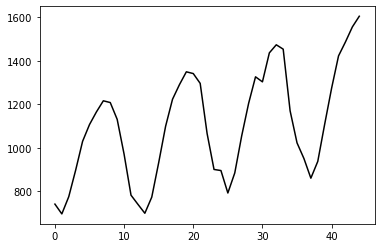

In [54]:
# Visualization of Forecasted values for Test data set using different methods 
plt.plot(Train.index, Train["Sales"], label='Train',color="black")


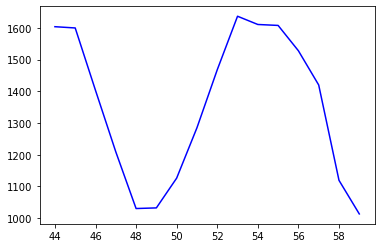

In [55]:
plt.plot(Test.index, Test["Sales"], label='Test',color="blue")


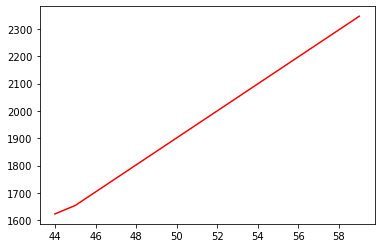

In [56]:
plt.plot(pred_hw.index, pred_hw, label='Holts_winter',color="red")


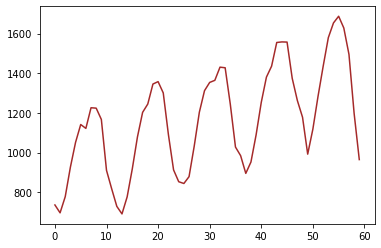

In [57]:
plt.plot(pred_hwe_add_add.index,pred_hwe_add_add,label="HoltsWinterExponential_1",color="brown")


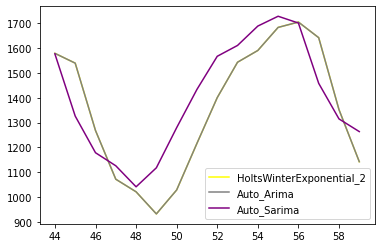

In [58]:
plt.plot(pred_hwe_mul_add.index,pred_hwe_mul_add,label="HoltsWinterExponential_2",color="yellow")
plt.plot(pred_hwe_mul_add.index,pred_hwe_mul_add,label="Auto_Arima",color="grey")
plt.plot(pred_hwe_mul_add.index,srma_pred,label="Auto_Sarima",color="purple")
plt.legend(loc='best')
